In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import fbeta_score,make_scorer

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import paired_distances
from scipy.sparse import hstack

In [2]:
train = pd.read_json('snli_1.0/snli_1.0_train.jsonl', lines = True)
test = pd.read_json('snli_1.0/snli_1.0_test.jsonl', lines = True)
val = pd.read_json('snli_1.0/snli_1.0_dev.jsonl', lines = True)
full = {'train': train, 'val':val, 'test': test}

In [3]:
train.head()

,annotator_labels,captionID,gold_label,pairID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,[neutral],3416050480.jpg#4,neutral,3416050480.jpg#4r1n,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,A person is training his horse for a competition.,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
1,[contradiction],3416050480.jpg#4,contradiction,3416050480.jpg#4r1c,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is at a diner, ordering an omelette.",( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
2,[entailment],3416050480.jpg#4,entailment,3416050480.jpg#4r1e,A person on a horse jumps over a broken down a...,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,"A person is outdoors, on a horse.","( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...
3,[neutral],2267923837.jpg#2,neutral,2267923837.jpg#2r1n,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,They are smiling at their parents,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...
4,[entailment],2267923837.jpg#2,entailment,2267923837.jpg#2r1e,Children smiling and waving at camera,( Children ( ( ( smiling and ) waving ) ( at c...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,There are children present,( There ( ( are children ) present ) ),(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...


In [4]:
def label_distribution(data, frame):
    print(frame, data.groupby('gold_label')['gold_label'].count())
    print()
    

for frame in full:
    label_distribution(full[frame], frame)

train gold_label
-                   785
contradiction    183187
entailment       183416
neutral          182764
Name: gold_label, dtype: int64

val gold_label
-                 158
contradiction    3278
entailment       3329
neutral          3235
Name: gold_label, dtype: int64

test gold_label
-                 176
contradiction    3237
entailment       3368
neutral          3219
Name: gold_label, dtype: int64



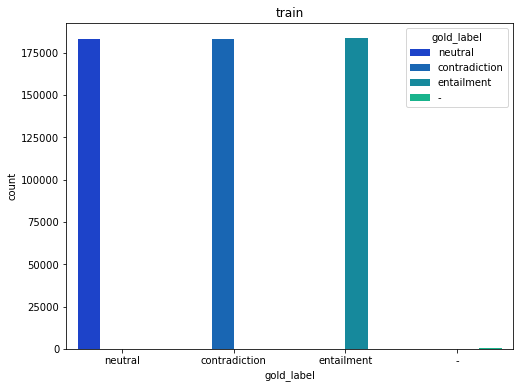

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="gold_label", hue="gold_label", data=train, palette = 'winter')
plt.title('train')
plt.show()

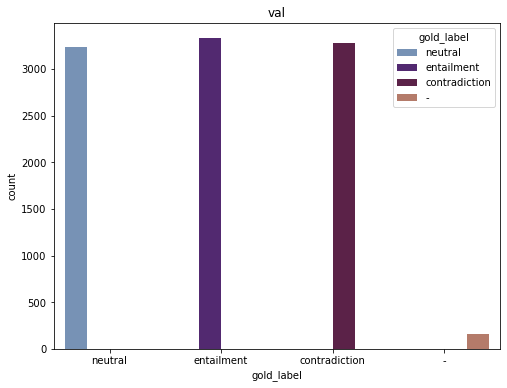

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x="gold_label", hue="gold_label", data=val, palette = 'twilight')
plt.title('val')
plt.show()

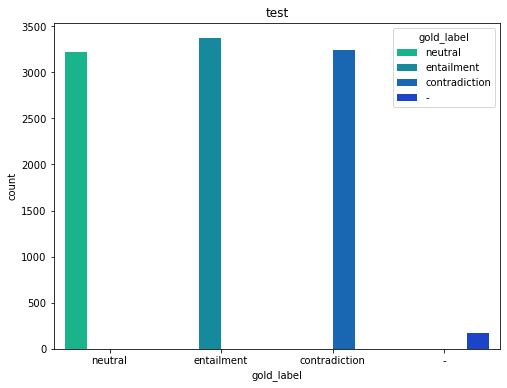

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x="gold_label", hue="gold_label", data=test, palette = 'winter_r')
plt.title('test')
plt.show()